In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [3]:
path = "../dataset/"
filename = "data_2_mes_final.csv"
file = path + str(filename)
df_mes = pd.read_csv(file, delimiter=';')

In [4]:
# Plotando

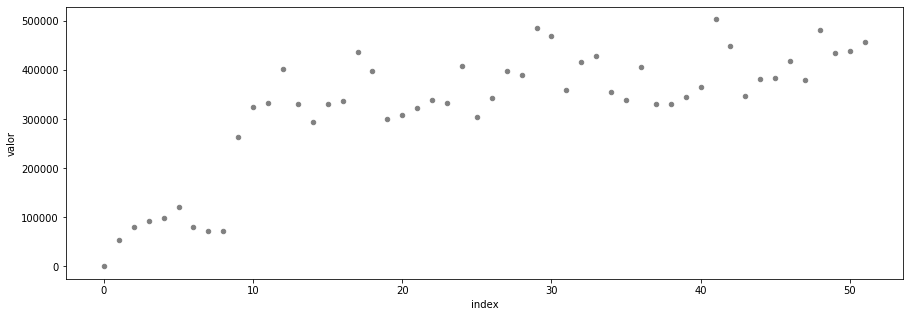

In [5]:
df_mes.plot(kind='scatter', x='index', y='valor', color='gray')

In [6]:
df_mes.tail()

,index,mes,ano,valor
47,47,6,2018,379383.08
48,48,7,2018,482195.78
49,49,8,2018,434308.16
50,50,9,2018,438753.21
51,51,10,2018,457025.59


In [7]:
# Dropando ultima linha do df

In [8]:
proxima_fatura_mes = df_mes['valor'].values[-1]
df_mes = df_mes.drop(df_mes.index[-1])

target_df_mes = [[proxima_fatura_mes]]

In [9]:
df_mes.tail()

,index,mes,ano,valor
46,46,5,2018,418669.53
47,47,6,2018,379383.08
48,48,7,2018,482195.78
49,49,8,2018,434308.16
50,50,9,2018,438753.21


In [10]:
# Test

In [11]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [12]:
X = pd.DataFrame(df_mes['index'])
y = pd.DataFrame(df_mes['valor'])

In [13]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [14]:
pred_df_mes = (model.predict([[51]]))

In [15]:
pred_df_mes

array([[455356.6428963]])

In [16]:
y_test = pred_df_mes
y_pred = target_df_mes
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1668.9471037014737
MSE 2785384.434953538
RMSE 1668.9471037014737


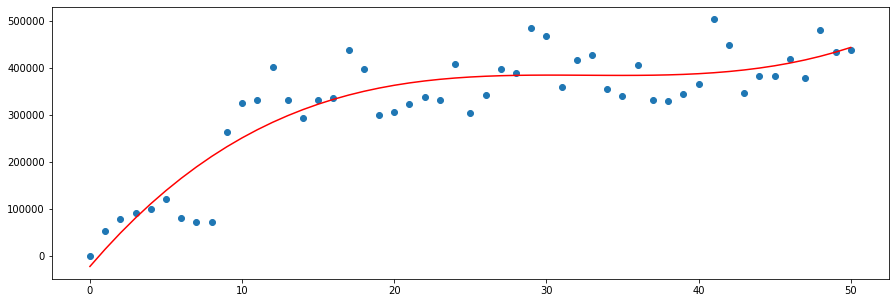

In [17]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [18]:
df_mes.corr()

,index,mes,ano,valor
index,1.000000,-0.071869,0.975635,0.759189
mes,-0.071869,1.000000,-0.288949,0.010911
ano,0.975635,-0.288949,1.000000,0.726289
valor,0.759189,0.010911,0.726289,1.000000


In [19]:
# correlação forte entre index e valor. 0.759

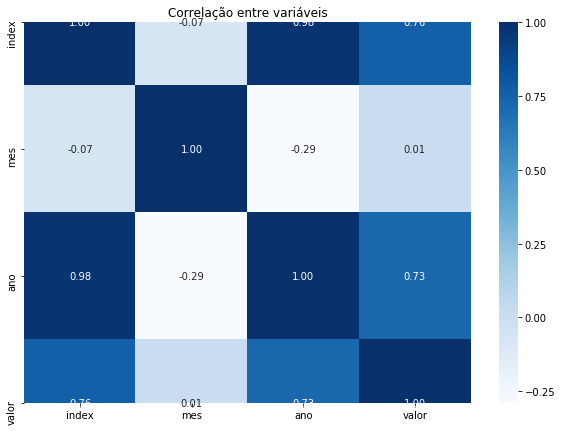

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_mes.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()